In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import scoring

from scipy.special import erfinv
from sklearn.metrics import mean_absolute_error as mae

# Plot prediction curves of different models

In [2]:
window_size = 7

In [3]:
data_RNN_1 = sio.loadmat('sequential_NN_models/RNN/results/window=%d/RNN_one_week.mat' % (window_size))
data_LSTM_1 = sio.loadmat('sequential_NN_models/LSTM/results/window=%d/LSTM_one_week.mat' % (window_size))
data_GRU_1 = sio.loadmat('sequential_NN_models/GRU/results/window=%d/GRU_one_week.mat' % (window_size))
data_transformer_1 = sio.loadmat('sequential_NN_models/transformer/results/window=%d/transformer_one_week.mat' % (window_size))

data_RNN_2 = sio.loadmat('sequential_NN_models/RNN/results/window=%d/RNN_two_week.mat' % (window_size))
data_LSTM_2 = sio.loadmat('sequential_NN_models/LSTM/results/window=%d/LSTM_two_week.mat' % (window_size))
data_GRU_2 = sio.loadmat('sequential_NN_models/GRU/results/window=%d/GRU_two_week.mat' % (window_size))
data_transformer_2 = sio.loadmat('sequential_NN_models/transformer/results/window=%d/transformer_two_week.mat' % (window_size))

data_RNN_3 = sio.loadmat('sequential_NN_models/RNN/results/window=%d/RNN_three_week.mat' % (window_size))
data_LSTM_3 = sio.loadmat('sequential_NN_models/LSTM/results/window=%d/LSTM_three_week.mat' % (window_size))
data_GRU_3 = sio.loadmat('sequential_NN_models/GRU/results/window=%d/GRU_three_week.mat' % (window_size))
data_transformer_3 = sio.loadmat('sequential_NN_models/transformer/results/window=%d/transformer_three_week.mat' % (window_size))

data_RNN_4 = sio.loadmat('sequential_NN_models/RNN/results/window=%d/RNN_four_week.mat' % (window_size))
data_LSTM_4 = sio.loadmat('sequential_NN_models/LSTM/results/window=%d/LSTM_four_week.mat' % (window_size))
data_GRU_4 = sio.loadmat('sequential_NN_models/GRU/results/window=%d/GRU_four_week.mat' % (window_size))
data_transformer_4 = sio.loadmat('sequential_NN_models/transformer/results/window=%d/transformer_four_week.mat' % (window_size))

In [4]:
data_RNN = [data_RNN_1, data_RNN_2, data_RNN_3, data_RNN_4]
data_LSTM = [data_LSTM_1, data_LSTM_2, data_LSTM_3, data_LSTM_4]
data_GRU = [data_GRU_1, data_GRU_2, data_GRU_3, data_GRU_4]
data_transformer = [data_transformer_1, data_transformer_2, data_transformer_3, data_transformer_4]

In [5]:
data_ref = sio.loadmat('sequential_NN_models//RNN/groundtruth_data_weekly_avg.mat')

for key in data_ref.keys():
    if key.startswith('__'):
        continue
    data_ref[key] = data_ref[key].reshape(-1)

In [6]:
data_pinn = sio.loadmat('sequential_NN_models/RNN/pinn_res_all.mat')

for key in data_pinn.keys():
    if key.startswith('__'):
        continue
    data_pinn[key] = data_pinn[key].reshape(-1)

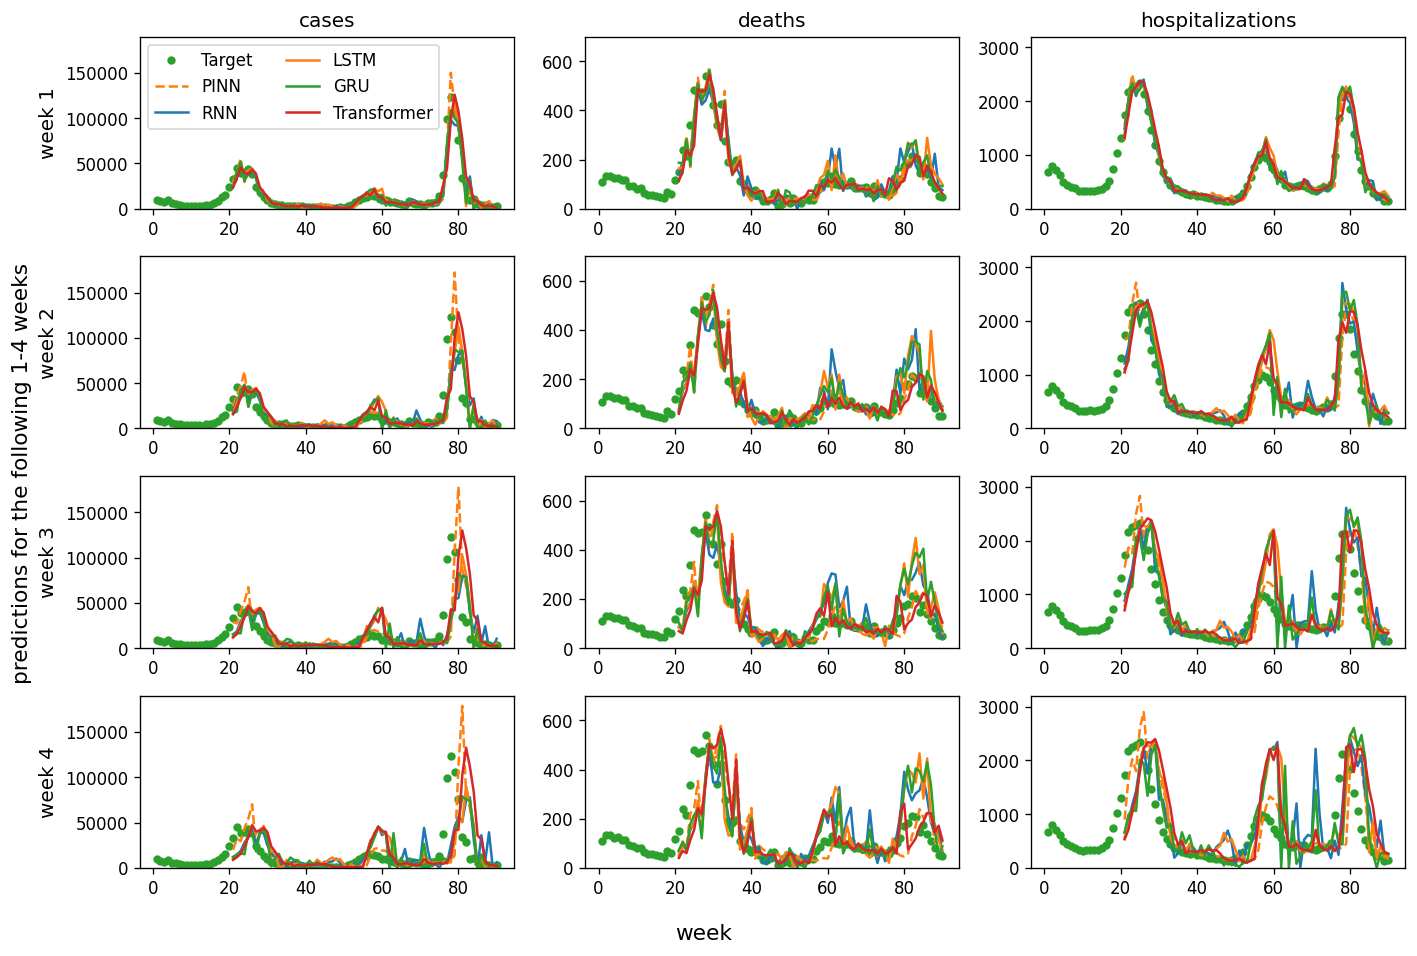

In [7]:
fig = plt.figure(figsize=(12, 8), dpi=120)
X, Y = 4, 3

for week in range(1, 5):
    plt.subplot(X, Y, Y * (week - 1) + 1)
    plt.plot(np.arange(1, 91), data_ref['cases'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'cases_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data_RNN[week-1]['pred'][4-week:, 0], '-', markersize=4, label='RNN')
    plt.plot(np.arange(21, 91), data_LSTM[week-1]['pred'][4-week:, 0], '-', markersize=4, label='LSTM')
    plt.plot(np.arange(21, 91), data_GRU[week-1]['pred'][4-week:, 0], '-', markersize=4, label='GRU')
    plt.plot(np.arange(21, 91), data_transformer[week-1]['pred'][4-week:, 0], '-', markersize=4, label='Transformer')
    if week == 1:
        plt.title('cases', fontsize=12)
        plt.legend(ncol=2)
    plt.ylabel("week " + str(week), fontsize=12)
    plt.ylim(0, 190000)

    plt.subplot(X, Y, Y * (week - 1) + 2)
    plt.plot(np.arange(1, 91), data_ref['deaths'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'deaths_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data_RNN[week-1]['pred'][4-week:, 1], '-', markersize=4, label='RNN')
    plt.plot(np.arange(21, 91), data_LSTM[week-1]['pred'][4-week:, 1], '-', markersize=4, label='LSTM')
    plt.plot(np.arange(21, 91), data_GRU[week-1]['pred'][4-week:, 1], '-', markersize=4, label='GRU')
    plt.plot(np.arange(21, 91), data_transformer[week-1]['pred'][4-week:, 1], '-', markersize=4, label='Transformer')
    if week == 1:
        plt.title('deaths', fontsize=12)
    plt.ylim(0, 700)

    plt.subplot(X, Y, Y * (week - 1) + 3)
    plt.plot(np.arange(1, 91), data_ref['hospitalized'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'hospitalized_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data_RNN[week-1]['pred'][4-week:, 2], '-', markersize=4, label='RNN')
    plt.plot(np.arange(21, 91), data_LSTM[week-1]['pred'][4-week:, 2], '-', markersize=4, label='LSTM')
    plt.plot(np.arange(21, 91), data_GRU[week-1]['pred'][4-week:, 2], '-', markersize=4, label='GRU')
    plt.plot(np.arange(21, 91), data_transformer[week-1]['pred'][4-week:, 2], '-', markersize=4, label='Transformer')
    if week == 1:
        plt.title('hospitalizations', fontsize=12)
    plt.ylim(0, 3200)

fig.supxlabel("week", fontsize=13)
fig.supylabel("predictions for the following 1-4 weeks", fontsize=13)
fig.tight_layout()
plt.show()

# Print MASE and plot results of different training data length

In [8]:
window_list = [3, 5, 7, 10, 12, 15]
model_dic = {'RNN': 'RNN', 'LSTM': 'LSTM', 'GRU': 'GRU', 'transformer': 'Transformer'}

for window_size in window_list:
    
    print("<<<<<<<<<<<<<<<<<<<<<< window size: %d weeks >>>>>>>>>>>>>>>>>>>>" % (window_size))

    for model in model_dic.keys():
        print('---------------------- %s models ----------------------\n' % (model))
        result_path = 'sequential_NN_models/%s/results/window=%d/%s' % (model, window_size, model)

        data_one_week = sio.loadmat(result_path + '_one_week.mat')
        data_two_week = sio.loadmat(result_path + '_two_week.mat')
        data_three_week = sio.loadmat(result_path + '_three_week.mat')
        data_four_week = sio.loadmat(result_path + '_four_week.mat')

        data = [data_one_week, data_two_week, data_three_week, data_four_week]

        mase_cases_list = []
        for week in range(1, 5):
            mae_cases = mae(data_ref['cases'][40:110], data[week-1]['pred'][4-week:, 0])
            mae_cases_naive = mae(data_ref['cases'][40:110], data_ref['cases'][40-week:110-week])
            mase_cases = round(mae_cases / mae_cases_naive, 2)
            mase_cases_list.append(mase_cases)
        print('Cases: ', mase_cases_list)

        
        mase_deaths_list = []
        for week in range(1, 5):
            mae_deaths = mae(data_ref['deaths'][40:110], data[week-1]['pred'][4-week:, 1])
            mae_deaths_naive = mae(data_ref['deaths'][40:110], data_ref['deaths'][40-week:110-week])
            mase_deaths = round(mae_deaths / mae_deaths_naive, 2)
            mase_deaths_list.append(mase_deaths)
        print('Deaths: ', mase_deaths_list)

        
        mase_hosp_list = []
        for week in range(1, 5):
            mae_hosp = mae(data_ref['hospitalized'][40:110], data[week-1]['pred'][4-week:, 2])
            mae_hosp_naive = mae(data_ref['hospitalized'][40:110], data_ref['hospitalized'][40-week:110-week])
            mase_hosp = round(mae_hosp / mae_hosp_naive, 2)
            mase_hosp_list.append(mase_hosp)
        print('Hosp: ', mase_hosp_list, '\n')

<<<<<<<<<<<<<<<<<<<<<< window size: 3 weeks >>>>>>>>>>>>>>>>>>>>
---------------------- RNN models ----------------------

Cases:  [1.2, 1.04, 0.99, 1.0]
Deaths:  [1.44, 1.35, 1.21, 1.1]
Hosp:  [0.81, 0.81, 0.87, 0.96] 

---------------------- LSTM models ----------------------

Cases:  [1.0, 0.97, 0.98, 0.94]
Deaths:  [1.46, 1.33, 1.22, 1.2]
Hosp:  [0.93, 0.93, 0.99, 1.05] 

---------------------- GRU models ----------------------

Cases:  [0.93, 0.86, 0.84, 0.87]
Deaths:  [1.61, 1.63, 1.34, 1.14]
Hosp:  [0.95, 0.94, 0.96, 1.01] 

---------------------- transformer models ----------------------

Cases:  [1.02, 1.02, 1.08, 1.08]
Deaths:  [1.13, 1.01, 1.05, 0.99]
Hosp:  [0.9, 0.96, 1.03, 1.06] 

<<<<<<<<<<<<<<<<<<<<<< window size: 5 weeks >>>>>>>>>>>>>>>>>>>>
---------------------- RNN models ----------------------

Cases:  [1.16, 1.05, 0.96, 0.94]
Deaths:  [1.21, 1.09, 0.93, 0.92]
Hosp:  [0.84, 0.9, 0.91, 0.94] 

---------------------- LSTM models ----------------------

Cases:  [0.95,

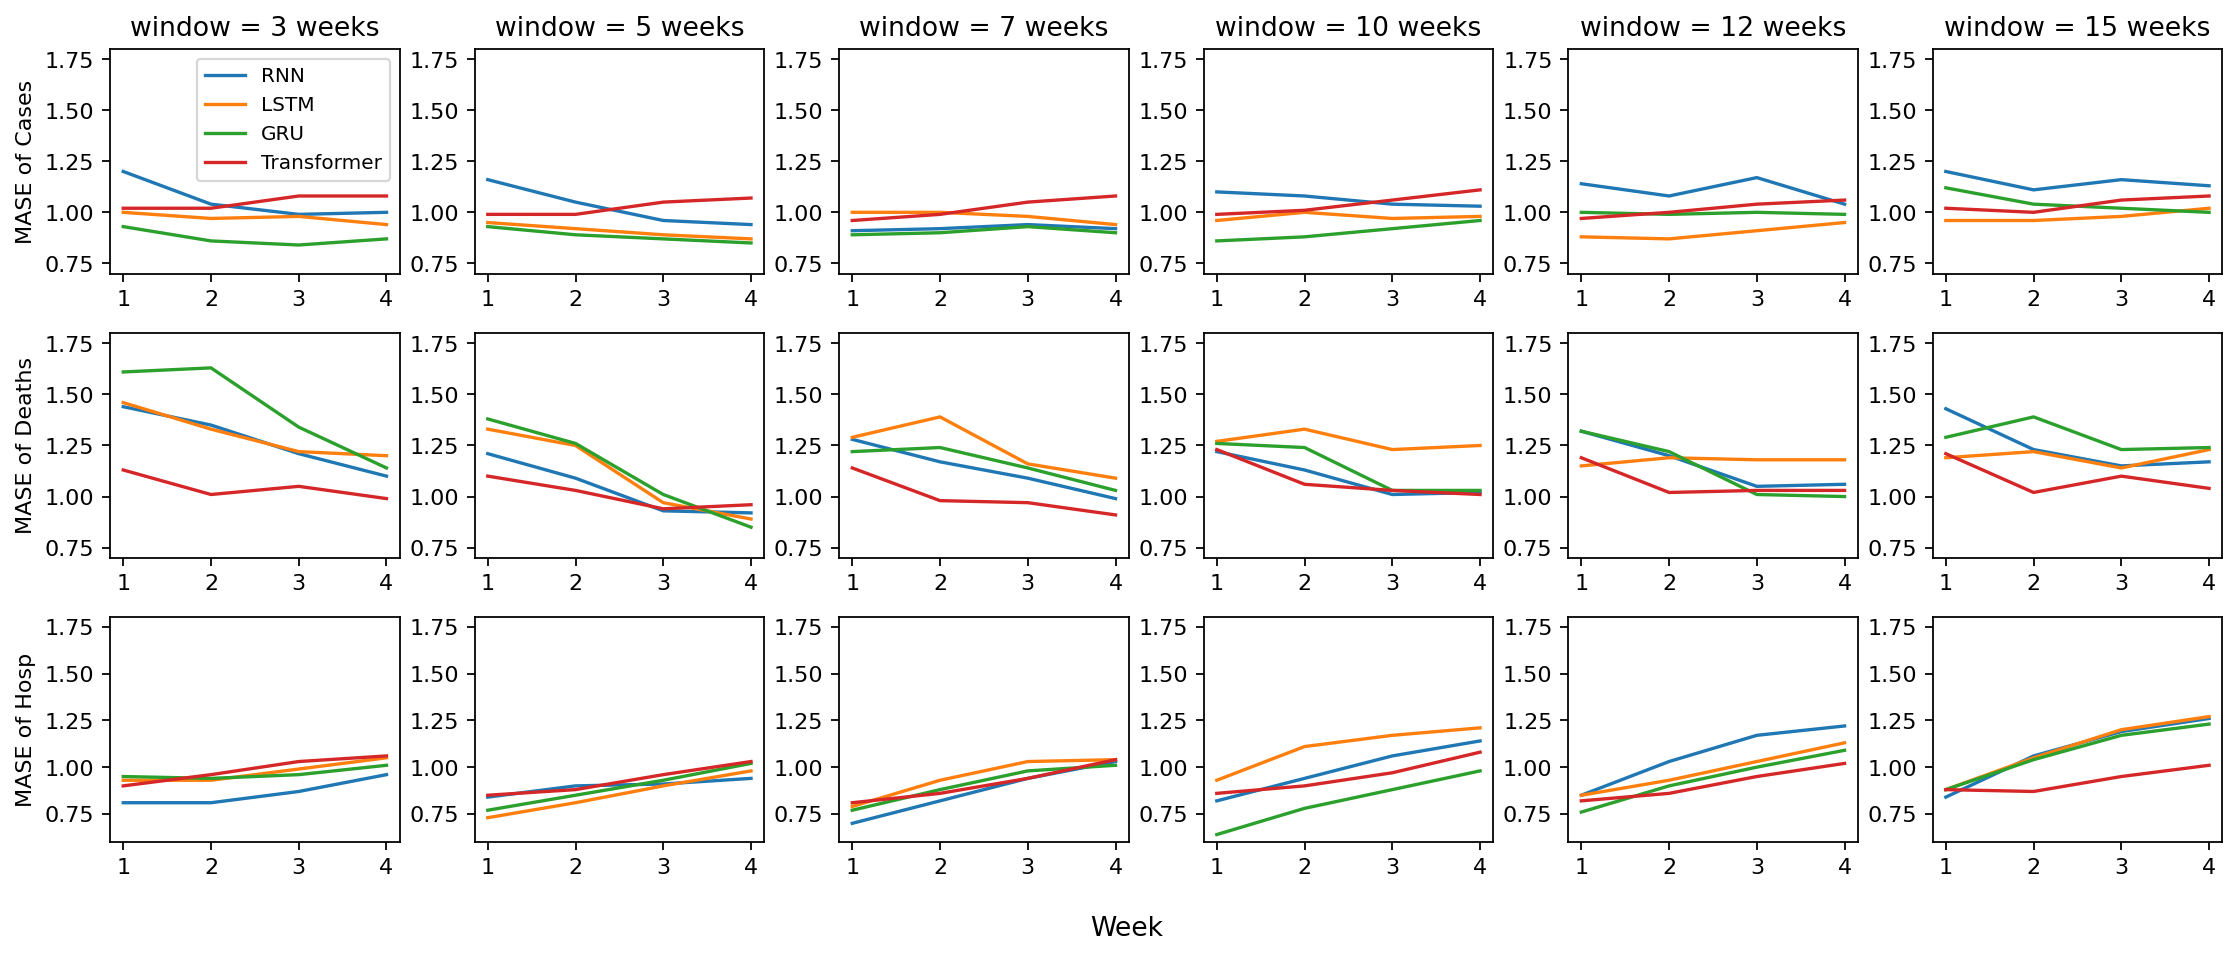

In [9]:
window_list = [3, 5, 7, 10, 12, 15]
model_dic = {'RNN': 'RNN', 'LSTM': 'LSTM', 'GRU': 'GRU', 'transformer': 'Transformer'}


fig = plt.figure(figsize=(14, 6), dpi=160)
X, Y = 3, 6
i = 1 # current column in subplots


for window_size in window_list:
    
    
    for model in model_dic.keys():
        
        result_path = 'sequential_NN_models/%s/results/window=%d/%s' % (model, window_size, model)

        data_one_week = sio.loadmat(result_path + '_one_week.mat')
        data_two_week = sio.loadmat(result_path + '_two_week.mat')
        data_three_week = sio.loadmat(result_path + '_three_week.mat')
        data_four_week = sio.loadmat(result_path + '_four_week.mat')

        data = [data_one_week, data_two_week, data_three_week, data_four_week]

        
        mase_cases_list = []
        for week in range(1, 5):
            mae_cases = mae(data_ref['cases'][40:110], data[week-1]['pred'][4-week:, 0])
            mae_cases_naive = mae(data_ref['cases'][40:110], data_ref['cases'][40-week:110-week])
            mase_cases = round(mae_cases / mae_cases_naive, 2)
            mase_cases_list.append(mase_cases)
        plt.subplot(X, Y, i)
        plt.plot(range(1, 5), mase_cases_list, label=model_dic[model])
        plt.title('window = %d weeks' % (window_size))
        plt.ylim(0.7, 1.8)
        if i == 1:
            plt.ylabel('MASE of Cases')
            plt.legend(ncol=1, fontsize=9)

        
        mase_deaths_list = []
        for week in range(1, 5):
            mae_deaths = mae(data_ref['deaths'][40:110], data[week-1]['pred'][4-week:, 1])
            mae_deaths_naive = mae(data_ref['deaths'][40:110], data_ref['deaths'][40-week:110-week])
            mase_deaths = round(mae_deaths / mae_deaths_naive, 2)
            mase_deaths_list.append(mase_deaths)
        plt.subplot(X, Y, Y + i)
        plt.plot(range(1, 5), mase_deaths_list, label=model_dic[model])
        plt.ylim(0.7, 1.8)
        if i == 1:
            plt.ylabel('MASE of Deaths')

        
        mase_hosp_list = []
        for week in range(1, 5):
            mae_hosp = mae(data_ref['hospitalized'][40:110], data[week-1]['pred'][4-week:, 2])
            mae_hosp_naive = mae(data_ref['hospitalized'][40:110], data_ref['hospitalized'][40-week:110-week])
            mase_hosp = round(mae_hosp / mae_hosp_naive, 2)
            mase_hosp_list.append(mase_hosp)
        plt.subplot(X, Y, Y * 2 + i)
        plt.plot(range(1, 5), mase_hosp_list, label=model_dic[model])
        plt.ylim(0.6, 1.8)
        if i == 1:
            plt.ylabel('MASE of Hosp')
    
    i += 1


fig.supxlabel('Week')
# fig.supylabel('MASE')
# fig.suptitle('MASE comparison between different models')
fig.tight_layout()
plt.show()

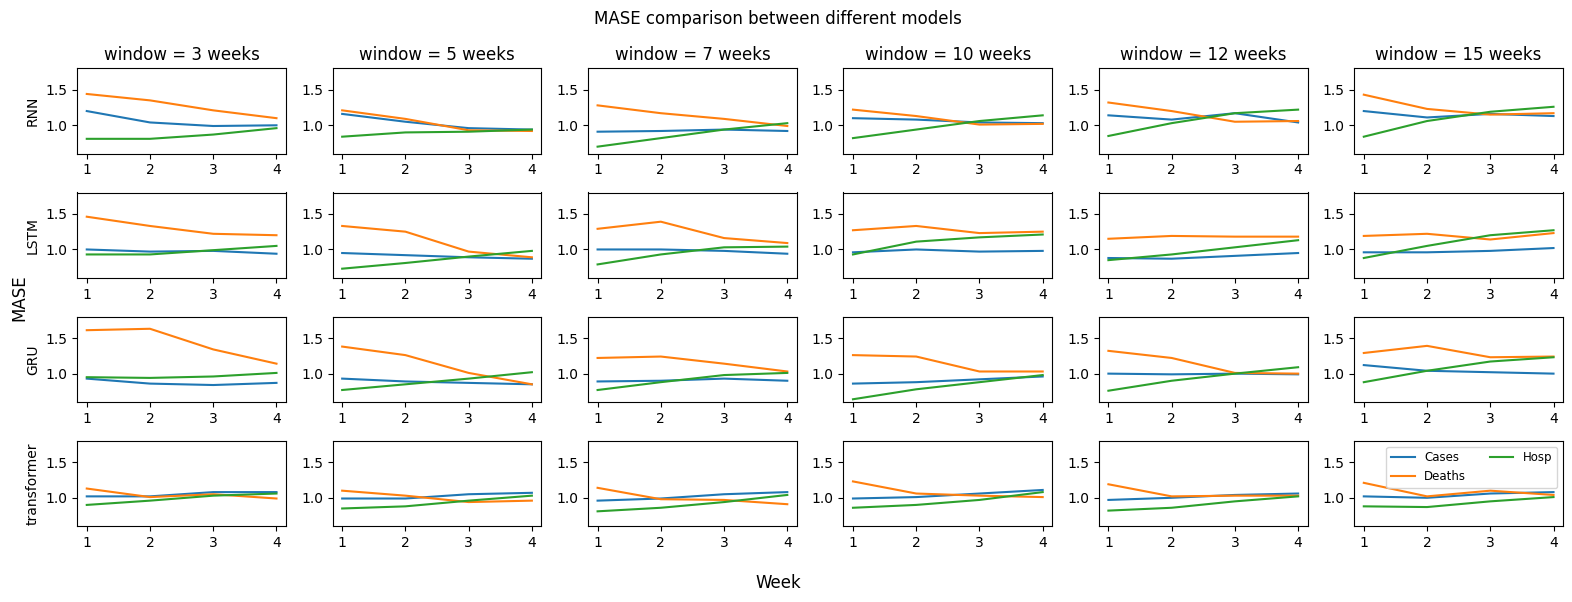

In [10]:
window_list = [3, 5, 7, 10, 12, 15]
model_dic = {'RNN': 'RNN', 'LSTM': 'LSTM', 'GRU': 'GRU', 'transformer': 'Transformer'}


fig = plt.figure(figsize=(16, 6), dpi=100)
X, Y = 4, 6
i = 1 # current column in subplots


for model in model_dic.keys():

    for window_size in window_list:
        
        result_path = 'sequential_NN_models/%s/results/window=%d/%s' % (model, window_size, model)

        data_one_week = sio.loadmat(result_path + '_one_week.mat')
        data_two_week = sio.loadmat(result_path + '_two_week.mat')
        data_three_week = sio.loadmat(result_path + '_three_week.mat')
        data_four_week = sio.loadmat(result_path + '_four_week.mat')

        data = [data_one_week, data_two_week, data_three_week, data_four_week]

        plt.subplot(X, Y, i)
        
        mase_cases_list = []
        for week in range(1, 5):
            mae_cases = mae(data_ref['cases'][40:110], data[week-1]['pred'][4-week:, 0])
            mae_cases_naive = mae(data_ref['cases'][40:110], data_ref['cases'][40-week:110-week])
            mase_cases = round(mae_cases / mae_cases_naive, 2)
            mase_cases_list.append(mase_cases)
        plt.plot(range(1, 5), mase_cases_list, label='Cases')
        if i <= Y:
            plt.title('window = %d weeks' % (window_size))
        if i % Y == 1:
            plt.ylabel(model)

        
        mase_deaths_list = []
        for week in range(1, 5):
            mae_deaths = mae(data_ref['deaths'][40:110], data[week-1]['pred'][4-week:, 1])
            mae_deaths_naive = mae(data_ref['deaths'][40:110], data_ref['deaths'][40-week:110-week])
            mase_deaths = round(mae_deaths / mae_deaths_naive, 2)
            mase_deaths_list.append(mase_deaths)
        plt.plot(range(1, 5), mase_deaths_list, label='Deaths')

        
        mase_hosp_list = []
        for week in range(1, 5):
            mae_hosp = mae(data_ref['hospitalized'][40:110], data[week-1]['pred'][4-week:, 2])
            mae_hosp_naive = mae(data_ref['hospitalized'][40:110], data_ref['hospitalized'][40-week:110-week])
            mase_hosp = round(mae_hosp / mae_hosp_naive, 2)
            mase_hosp_list.append(mase_hosp)
        plt.plot(range(1, 5), mase_hosp_list, label='Hosp')
        plt.ylim(0.6, 1.8)
        if i == X * Y:
            plt.legend(ncol=2, fontsize=8.5)
        i += 1


fig.supxlabel('Week')
fig.supylabel('MASE')
fig.suptitle('MASE comparison between different models')
fig.tight_layout()
plt.show()

# Calculate WIS

In [11]:
q_list = [0.010, 0.025, 0.050, 0.100, 0.150, 0.200, 0.250, 0.300, 0.350, 0.400,
          0.450, 0.500, 0.550, 0.600, 0.650, 0.700, 0.750, 0.800, 0.850, 0.900, 0.950, 0.975, 0.990]
    
# all means, all qs
def cal_quantile_forecasts_all(mean_list, std): 
    all_res = {}
    for q in q_list:
        res = []
        for mean in mean_list:
            val = mean + std * math.sqrt(2) * erfinv(2 * q - 1)
            res = res + [val]
        all_res[q] = np.array(res)
    return all_res


alpha_list = [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [12]:
print('---------------------- Naive models ----------------------\n')

naive_wis_cases_list = []
for week in range(1, 5):
    errors = data_ref['cases'][40-week:110-week] - data_ref["cases"][40:110]
    quantile_all = cal_quantile_forecasts_all(data_ref['cases'][40-week:110-week], np.std(errors))
    wis = scoring.weighted_interval_score(data_ref["cases"][40:110], alphas=alpha_list,
                                          weights=None, q_dict=quantile_all)[0]
    wis = int(round(np.mean(wis), 0))
    naive_wis_cases_list.append(wis)
print('Wis of Cases: ', naive_wis_cases_list)


naive_wis_deaths_list = []
for week in range(1, 5):
    errors = data_ref['deaths'][40-week:110-week] - data_ref["deaths"][40:110]
    quantile_all = cal_quantile_forecasts_all(data_ref['deaths'][40-week:110-week], np.std(errors))
    wis = scoring.weighted_interval_score(data_ref["deaths"][40:110], alphas=alpha_list,
                                          weights=None, q_dict=quantile_all)[0]
    wis = int(round(np.mean(wis), 0))
    naive_wis_deaths_list.append(wis)
print('Wis of Deaths: ', naive_wis_deaths_list)


naive_wis_hosp_list = []
for week in range(1, 5):
    errors = data_ref['hospitalized'][40-week:110-week] - data_ref["hospitalized"][40:110]
    quantile_all = cal_quantile_forecasts_all(data_ref['hospitalized'][40-week:110-week], np.std(errors))
    wis = scoring.weighted_interval_score(data_ref["hospitalized"][40:110], alphas=alpha_list,
                                          weights=None, q_dict=quantile_all)[0]
    wis = int(round(np.mean(wis), 0))
    naive_wis_hosp_list.append(wis)
print('Wis of Hosp: ', naive_wis_hosp_list, '\n')

---------------------- Naive models ----------------------

Wis of Cases:  [23080, 41610, 56786, 67313]
Wis of Deaths:  [99, 146, 193, 245]
Wis of Hosp:  [437, 848, 1222, 1551] 



In [13]:
print('---------------------- PINN models ----------------------\n')
data = sio.loadmat('result/res_V14_1.mat')

wis_cases_list = []
for week in range(1, 5):
    errors = data['all_cases_pred'][week-1][40:-4]*120000 - data_ref["cases"][40:110]
    quantile_all = cal_quantile_forecasts_all(data['all_cases_pred'][week-1][40:-4]*120000, np.std(errors))
    wis = scoring.weighted_interval_score(data_ref["cases"][40:110], alphas=alpha_list,
                                          weights=None, q_dict=quantile_all)[0]
    wis = int(round(np.mean(wis), 0))
    wis_cases_list.append(wis)
print('Wis of Cases: ', wis_cases_list)
scaled_wis_cases_list = []
for i in range(len(wis_cases_list)):
    scaled_wis = round(wis_cases_list[i] / naive_wis_cases_list[i], 2)
    scaled_wis_cases_list.append(scaled_wis)
print('Sclaed wis of Cases: ', scaled_wis_cases_list, '\n')

wis_deaths_list = []
for week in range(1, 5):
    errors = data['all_deaths_pred'][week-1][40:-4]*500 - data_ref["deaths"][40:110]
    quantile_all = cal_quantile_forecasts_all(data['all_deaths_pred'][week-1][40:-4]*500, np.std(errors))
    wis = scoring.weighted_interval_score(data_ref["deaths"][40:110], alphas=alpha_list,
                                          weights=None, q_dict=quantile_all)[0]
    wis = int(round(np.mean(wis), 0))
    wis_deaths_list.append(wis)
print('Wis of Deaths: ', wis_deaths_list)
scaled_wis_deaths_list = []
for i in range(len(wis_deaths_list)):
    scaled_wis = round(wis_deaths_list[i] / naive_wis_deaths_list[i], 2)
    scaled_wis_deaths_list.append(scaled_wis)
print('Sclaed wis of Deaths: ', scaled_wis_deaths_list, '\n')
    
wis_hosp_list = []
for week in range(1, 5):
    errors = data['all_hospitalized_pred'][week-1][40:-4]*2000 - data_ref["hospitalized"][40:110]
    quantile_all = cal_quantile_forecasts_all(data['all_hospitalized_pred'][week-1][40:-4]*2000, np.std(errors))
    wis = scoring.weighted_interval_score(data_ref["hospitalized"][40:110], alphas=alpha_list,
                                          weights=None, q_dict=quantile_all)[0]
    wis = int(round(np.mean(wis), 0))
    wis_hosp_list.append(wis)
print('Wis of Hosp: ', wis_hosp_list)
scaled_wis_hosp_list = []
for i in range(len(wis_hosp_list)):
    scaled_wis = round(wis_hosp_list[i] / naive_wis_hosp_list[i], 2)
    scaled_wis_hosp_list.append(scaled_wis)
print('Sclaed wis of Hosp: ', scaled_wis_hosp_list, '\n')

---------------------- PINN models ----------------------

Wis of Cases:  [16247, 32954, 49272, 63311]
Sclaed wis of Cases:  [0.7, 0.79, 0.87, 0.94] 

Wis of Deaths:  [103, 146, 176, 217]
Sclaed wis of Deaths:  [1.04, 1.0, 0.91, 0.89] 

Wis of Hosp:  [250, 556, 882, 1232]
Sclaed wis of Hosp:  [0.57, 0.66, 0.72, 0.79] 



In [14]:
window_size = 7

model_dic = {'RNN': 'RNN', 'LSTM': 'LSTM', 'GRU': 'GRU', 'transformer': 'Transformer'}

for model in model_dic.keys():
    print('---------------------- %s models ----------------------\n' % (model))
    result_path = 'sequential_NN_models/%s/results/window=%d/%s' % (model, window_size, model)

    data_one_week = sio.loadmat(result_path + '_one_week.mat')
    data_two_week = sio.loadmat(result_path + '_two_week.mat')
    data_three_week = sio.loadmat(result_path + '_three_week.mat')
    data_four_week = sio.loadmat(result_path + '_four_week.mat')

    data = [data_one_week, data_two_week, data_three_week, data_four_week]

    wis_cases_list = []
    for week in range(1, 5):
        errors = data[week-1]['pred'][4-week:, 0] - data_ref["cases"][40:110]
        quantile_all = cal_quantile_forecasts_all(data[week-1]['pred'][4-week:, 0], np.std(errors))
        wis = scoring.weighted_interval_score(data_ref["cases"][40:110], alphas=alpha_list,
                                              weights=None, q_dict=quantile_all)[0]
        wis = int(round(np.mean(wis), 0))
        wis_cases_list.append(wis)
    print('Wis of Cases: ', wis_cases_list)
    scaled_wis_cases_list = []
    for i in range(len(wis_cases_list)):
        scaled_wis = round(wis_cases_list[i] / naive_wis_cases_list[i], 2)
        scaled_wis_cases_list.append(scaled_wis)
    print('Sclaed wis of Cases: ', scaled_wis_cases_list, '\n')
    
    
    wis_deaths_list = []
    for week in range(1, 5):
        errors = data[week-1]['pred'][4-week:, 1] - data_ref["deaths"][40:110]
        quantile_all = cal_quantile_forecasts_all(data[week-1]['pred'][4-week:, 1], np.std(errors))
        wis = scoring.weighted_interval_score(data_ref["deaths"][40:110], alphas=alpha_list,
                                              weights=None, q_dict=quantile_all)[0]
        wis = int(round(np.mean(wis), 0))
        wis_deaths_list.append(wis)
    print('Wis of Deaths: ', wis_deaths_list)
    scaled_wis_deaths_list = []
    for i in range(len(wis_deaths_list)):
        scaled_wis = round(wis_deaths_list[i] / naive_wis_deaths_list[i], 2)
        scaled_wis_deaths_list.append(scaled_wis)
    print('Sclaed wis of Deaths: ', scaled_wis_deaths_list, '\n')


    wis_hosp_list = []
    for week in range(1, 5):
        errors = data[week-1]['pred'][4-week:, 2] - data_ref["hospitalized"][40:110]
        quantile_all = cal_quantile_forecasts_all(data[week-1]['pred'][4-week:, 2], np.std(errors))
        wis = scoring.weighted_interval_score(data_ref["hospitalized"][40:110], alphas=alpha_list,
                                              weights=None, q_dict=quantile_all)[0]
        wis = int(round(np.mean(wis), 0))
        wis_hosp_list.append(wis)
    print('Wis of Hosp: ', wis_hosp_list, '\n')
    scaled_wis_hosp_list = []
    for i in range(len(wis_hosp_list)):
        scaled_wis = round(wis_hosp_list[i] / naive_wis_hosp_list[i], 2)
        scaled_wis_hosp_list.append(scaled_wis)
    print('Sclaed wis of Hosp: ', scaled_wis_hosp_list, '\n')

---------------------- RNN models ----------------------

Wis of Cases:  [17653, 33544, 46641, 53964]
Sclaed wis of Cases:  [0.76, 0.81, 0.82, 0.8] 

Wis of Deaths:  [126, 168, 205, 242]
Sclaed wis of Deaths:  [1.27, 1.15, 1.06, 0.99] 

Wis of Hosp:  [278, 642, 1105, 1554] 

Sclaed wis of Hosp:  [0.64, 0.76, 0.9, 1.0] 

---------------------- LSTM models ----------------------

Wis of Cases:  [19622, 35249, 49661, 56474]
Sclaed wis of Cases:  [0.85, 0.85, 0.87, 0.84] 

Wis of Deaths:  [124, 194, 226, 268]
Sclaed wis of Deaths:  [1.25, 1.33, 1.17, 1.09] 

Wis of Hosp:  [325, 786, 1249, 1624] 

Sclaed wis of Hosp:  [0.74, 0.93, 1.02, 1.05] 

---------------------- GRU models ----------------------

Wis of Cases:  [16952, 33573, 47267, 55414]
Sclaed wis of Cases:  [0.73, 0.81, 0.83, 0.82] 

Wis of Deaths:  [115, 178, 225, 262]
Sclaed wis of Deaths:  [1.16, 1.22, 1.17, 1.07] 

Wis of Hosp:  [324, 749, 1198, 1608] 

Sclaed wis of Hosp:  [0.74, 0.88, 0.98, 1.04] 

---------------------- tran